In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
df = pd.read_csv('C:/Users/rishi/Desktop/ML/Datasets/height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


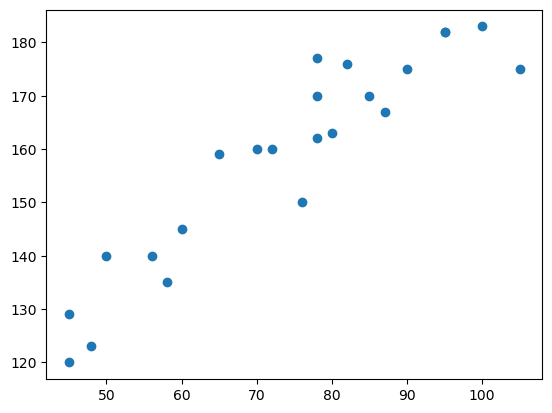

In [53]:
plt.scatter(df['Weight'], df['Height'])

In [54]:
# Divide Dataset into independent and dependent features
X = df[['Weight']]
y = df['Height']

In [55]:
# Train-Test Split
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.20)

In [56]:
# Standardize the dataset Train data --> scale the dataset using z-score formula
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
# Here we use fit_transform to calculate mean and std of X_train and then apply z-score formula on X_train

X_test = sc.transform(X_test)
# But here we use transform only, we take mean and std value from X_train and then apply those values on z-score formula on X_test 
# Reason --> Data leakage

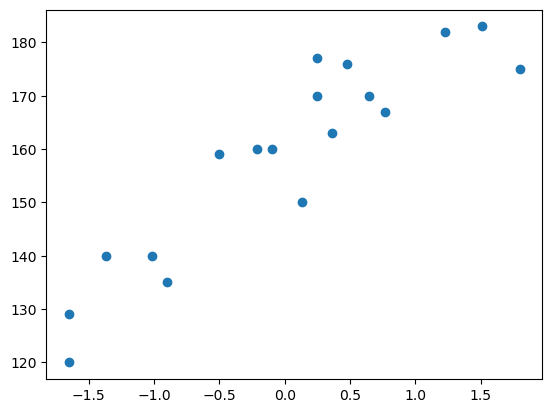

In [57]:
plt.scatter(X_train, y_train)

In [58]:
# Train the model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Slope or Coefficient:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Slope or Coefficient: [16.81108772]
Intercept: 158.66666666666666


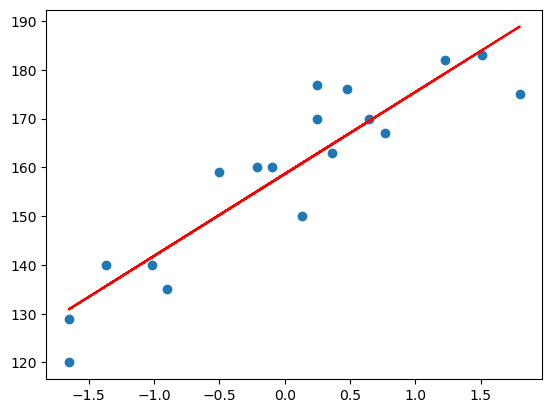

In [59]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'red')
# Best Fitting Line

In [64]:
y_test_prediction = regressor.predict(X_test)
y_test_prediction, y_test

(array([145.39905461, 179.23952261, 133.79660844, 174.40517004,
        162.80272387]),
 3     145
 11    182
 2     123
 7     175
 5     162
 Name: Height, dtype: int64)

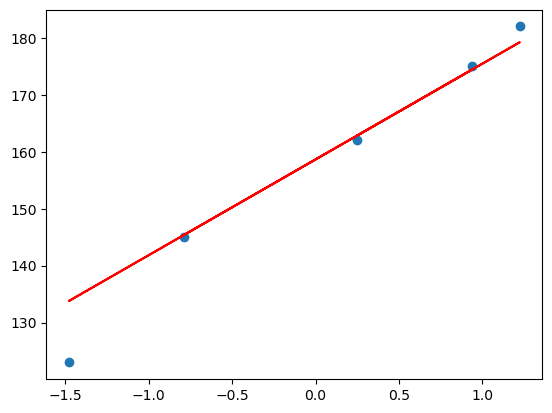

In [63]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_prediction, color = 'red')

In [66]:
# Cost Functions
# MSE, MAE, RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_test_prediction) # Actual data and Predicted Data
mae = mean_absolute_error(y_test, y_test_prediction)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
# Less value means, model is better

Mean Squared Error: 25.068884417353825
Mean Absolute Error: 3.07073885389334
Root Mean Squared Error: 5.00688370319841


In [78]:
# Performance Metrics
from sklearn.metrics import r2_score

# R squared:
score = r2_score(y_test, y_test_prediction)
print("Accuracy of r squared:", score)

# Adjusted R squared:
n = (len(y_test) - 1) # No of observations
k = X_test.shape[1] # No of predictor variables
adjusted_score = 1 - ((1 - score) * (n - 1)  / (n - k - 1))
print("Accuracy of Adjusted r squared:", adjusted_score)

Accuracy of r squared: 0.9448599234177507
Accuracy of Adjusted r squared: 0.917289885126626


In [82]:
# Adding new DataPoint: weight = 80

scaled_weight = sc.transform([[80]])
print("Height prediction for Weight 80 kg is:", regressor.predict(scaled_weight))

Height prediction for Weight 80 kg is: [164.73646489]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
